# Attack Demo (CIFAR10)

In [1]:
import torch
from data import PoisonedDataset, load_init_data, create_backdoor_data_loader
import os
import matplotlib.pyplot as plt
import numpy as np

from auto_LiRPA import BoundedModule, BoundedTensor, PerturbationLpNorm
from models.badnet import BadNet # LiRPA failed...
from models.mobilenet import MobileNetV2 # LiRPA failed...
from models.resnet18 import ResNet18 # LiRPA failed...
from models.vnncomp_resnet import resnet2b, resnet4b # LiRPA okay
from models.resnext import ResNeXt_cifar # LiRPA failed...
from models.resnet import model_resnet # LiRPA failed...
from models.densenet import Densenet_cifar_32 # LiRPA failed...

trigger_label = 0 # backdoor attack target label
"""Select the mark type"""
mark_dir = None # a white square at the right bottom corner
# mark_dir = './marks/apple_white.png'
# mark_dir = './marks/apple_black.png'
# mark_dir = './marks/watermark_white.png'
# mark_dir = './marks/watermark_black.png'
alpha = 0.1 # mark transparency, only available when `mark_dir` is specified
show_num = 2 # number of inputs to be shown

In [3]:
train_data, test_data = load_init_data(dataname='cifar10', device=torch.device("cpu"), download=False, dataset_path='./dataset/')
train_data_loader, test_data_ori_loader, test_data_tri_loader = create_backdoor_data_loader(
    dataname='cifar10',
    train_data=train_data,
    test_data=test_data,
    trigger_label=trigger_label,
    poisoned_portion=0,
    batch_size=32,
    device=torch.device("cpu"),
    mark_dir=mark_dir,
    alpha=alpha)

## generate train Bad Imgs
Injecting Over: 0 Bad Imgs, 50000 Clean Imgs (0.00)
## generate test Bad Imgs
Injecting Over: 0 Bad Imgs, 10000 Clean Imgs (0.00)
## generate test Bad Imgs
Injecting Over: 10000 Bad Imgs, 0 Clean Imgs (1.00)


Showing clean inputs:


WARNING  16:21:33     Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
WARNING  16:21:33     Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


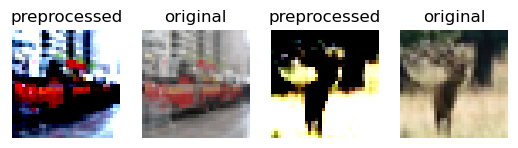

Showing triggered inputs:


WARNING  16:21:33     Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
WARNING  16:21:33     Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


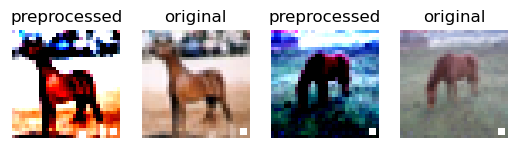

In [9]:
# Clean Inputs
print("Showing clean inputs:")
for step, (batch_x, batch_y) in enumerate(test_data_ori_loader):
    for i in range(show_num):
        plt.subplot(show_num, 4, i * 2 + 1)
        plt.imshow(batch_x[i, :, :, :].permute(1, 2, 0), interpolation='nearest')
        plt.axis('off')
        plt.title('preprocessed')
        plt.subplot(show_num, 4, i * 2 + 2)
        plt.imshow(batch_x[i, :, :, :].permute(1, 2, 0) * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406]), interpolation='nearest')
        plt.axis('off')
        plt.title('original')
    plt.show()
    break

# Triggered Inputs
print("Showing triggered inputs:")
for step, (batch_x, batch_y) in enumerate(test_data_tri_loader):
    for i in range(show_num):
        plt.subplot(show_num, 4, i * 2 + 1)
        plt.imshow(batch_x[i, :, :, :].permute(1, 2, 0), interpolation='nearest')
        plt.axis('off')
        plt.title('preprocessed')
        plt.subplot(show_num, 4, i * 2 + 2)
        plt.imshow(batch_x[i, :, :, :].permute(1, 2, 0) * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406]), interpolation='nearest')
        plt.axis('off')
        plt.title('original')
    plt.show()
    break